# Exercice 0: Getting Started: standard Hopfield network
## Exercise 0.1

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns

In [16]:
# Set seed for reproducibility
np.random.seed(42)

# Ex 0.1 Implement methods for patterns and network state update
def generate_balanced_random_patterns(N, M):
    return np.array(np.random.choice([-1, 1], (M, N)),dtype=float)


def update_state(S, W, beta=4):
    h = np.dot(W, S)
    return (np.tanh(beta * h))




# Exercise 0.2

In [352]:
def flip_bits(pattern, c):
    flip_indices = np.random.choice(len(pattern), size=int(len(pattern) * c), replace=False)
    pattern_flipped = pattern.copy()
    pattern_flipped[flip_indices] *= -1
    
    return pattern_flipped


def compute_overlap(state, patterns):
    return np.dot(patterns, state) / len(state)

def run_standard_hopfield_network(N, M, T):
    patterns = generate_balanced_random_patterns(N, M)
    W = 1/N * np.dot(patterns.T, patterns)
 
    # Set initial state close to the first pattern
    initial_state = flip_bits(patterns[0], c=0.05)
    # Let the network evolve
    state = initial_state
    for t in range(T):  # Simulate for 20 time steps
            state = update_state(state, W)
            overlaps = compute_overlap(state, patterns)
            #print(f"Time step {t}, Overlaps: {overlaps}")
    
    return state, patterns
    
def plot_standard_hopfield_network_results(M, state, patterns):
    fig, ax = plt.subplots(nrows=M, ncols=2, figsize=(5, 5))
    # Display the original pattern
    for i in range(M):
        ax[i, 0].imshow(patterns[i].reshape(10, 10), cmap='binary', vmin=-1, vmax=1)
        ax[i, 0].set_title(f'Original Pattern {i+1}')
        ax[i, 0].axis('off')  # Hide grid lines and ticks for clarity
        # Display the retrieved pattern
        ax[i, 1].imshow(state.reshape(10, 10), cmap='binary', vmin=-1, vmax=1)
        ax[i, 1].set_title(f'Retrieved Pattern {i+1}')
        ax[i, 1].axis('off')  # Hide grid lines and ticks for clarity
    plt.suptitle("Comparison of Original and Retrieved Patterns")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig("Ex0.2_pattern_retrieval.png", )
    plt.show()


Computational cost: 0.0 seconds


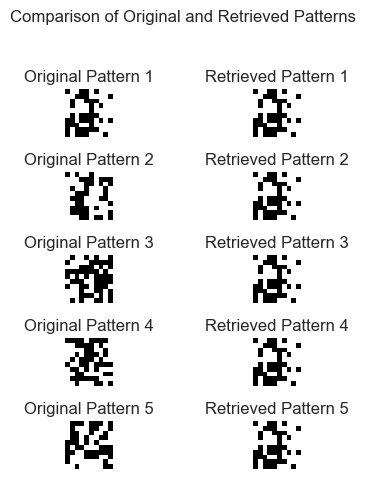

In [353]:

N = 100
M = 5
T = 10
start_time = time.time()
state, patterns = run_standard_hopfield_network(N,M,T)
print("Computational cost:", time.time() - start_time, "seconds")
plot_standard_hopfield_network_results(M,state,patterns)

# Exercise 1: Storage capacity in the standard Hopfield network
## Exercise 1.1

In [354]:
def update_state_with_overlaps(state,patterns, beta=4):
    #h = np.zeros_like(S, dtype=float)
    #for i in range(N):
        #h[i] = np.sum(m * patterns[:, i])
    m= np.dot(patterns, state) / N
    h=np.dot(m,patterns)
    
    return np.tanh(beta * h)

def run_standard_hopfield_network_with_overlaps(N, M, T):
    patterns = generate_balanced_random_patterns(N, M)
    

    #W = 1/N * np.dot(patterns.T, patterns)
    # Set initial state close to the first pattern
    initial_state = flip_bits(patterns[0], c=0.05)
    # Let the network evolve
    state = initial_state
    
    for t in range(T):  # Simulate for 20 time steps
        state = update_state_with_overlaps(state,patterns)


    return state, patterns

In [355]:
N = 100
M = 5
T = 10
start_time1 = time.time()
_,_ = run_standard_hopfield_network_with_overlaps(N,M,T)
end_time1 = time.time()
print("Computational cost of single update step:", end_time1 - start_time1, "seconds")

start_time2 = time.time()
_,_ = run_standard_hopfield_network(N,M,T)
end_time2=time.time()
print("Computational cost of standard update step:", end_time2 - start_time2, "seconds")

Computational cost of single update step: 0.0015032291412353516 seconds
Computational cost of standard update step: 0.0010111331939697266 seconds


## Exercise 1.2

In [356]:
def hamming_distance(P1, P2):
    return (len(P1) - np.dot(P1, P2)) / (2 * len(P1))

## Exercise 1.3

In [357]:
# Parameters

def run_standard_hopfield_network_with_hamming_distance(N,M,T):
    patterns = generate_balanced_random_patterns(N, M)
    patterns =np.array(patterns,dtype=float)
    initial_state = flip_bits(patterns[0], c=0.15)
    state = initial_state
    distances = []


  
    # Simulate the network
    for t in range(T):
        
        state = update_state_with_overlaps(state,patterns)  # Example overlap
        print(state)
        distances.append([hamming_distance(state, p) for p in patterns])
        overlaps = compute_overlap(state, patterns)
        print(f"Time step {t}, Overlaps: {overlaps}")
    
    return np.array(distances,dtype=float), state, patterns
    
def plot_patterns_state_comparison_hamming_distances(distances,M, state,patterns):

    fig, ax = plt.subplots(nrows=M, ncols=2, figsize=(12, 12))
    
    for i in range(M):
        # Display the original pattern
        ax[i, 0].imshow(patterns[i].reshape(15, 20), cmap='binary', vmin=-1, vmax=1)
        ax[i, 0].set_title(f'Original Pattern {i+1}')
        ax[i, 0].axis('off')  # Hide grid lines and ticks for clarity
    
        # Display the retrieved pattern (assuming final state resembles the first pattern)
        ax[i, 1].imshow(state.reshape(15, 20), cmap='binary', vmin=-1, vmax=1)
        ax[i, 1].set_title(f'Retrieved Pattern {i+1}')
        ax[i, 1].axis('off')  # Hide grid lines and ticks for clarity
    
    # Add a super title and show the plot for patterns
    plt.suptitle('Comparison of Original and Retrieved Patterns')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
    
    # Plot Hamming distances
    plt.figure(figsize=(10, 5))
    for i in range(M):
        plt.plot(distances[:, i], label=f'Pattern {i+1}')
    plt.xlabel('Time step')
    plt.ylabel('Hamming distance')
    plt.title('Evolution of Hamming Distances Over Time')
    plt.legend()
    plt.show()

[-0.99337455  0.98086936 -0.99717223  0.99404289 -0.99745797  0.99745797
 -0.9918055  -0.9918055  -0.97873885 -0.9908873  -0.99650097 -0.99650097
  0.99337455  0.98451616  0.99404289 -0.99404289 -0.97873885  0.97873885
  0.99337455 -0.98451616  0.9918055   0.99404289  0.99717223  0.99337455
  0.9908873   0.99745797 -0.9908873   0.99717223  0.9918055   0.98086936
 -0.9908873  -0.98086936 -0.97873885  0.9918055   0.9908873  -0.9908873
 -0.99337455 -0.98086936  0.9908873  -0.98607182 -0.99650097 -0.99404289
  0.98451616  0.99404289  0.9918055  -0.9918055   0.99337455 -0.97873885
  0.9908873   0.99337455 -0.9918055   0.98451616 -0.9918055   0.99337455
 -0.98451616  0.9908873  -0.97873885  0.99610788 -0.98086936  0.99610788
 -0.98451616  0.9918055  -0.9918055   0.99337455 -0.99650097 -0.98086936
 -0.97873885 -0.98607182 -0.9918055  -0.99745797  0.9908873  -0.99650097
 -0.99337455  0.99610788  0.99717223  0.99404289 -0.99650097 -0.9918055
  0.99404289 -0.98607182 -0.99404289 -0.99717223 -0.9

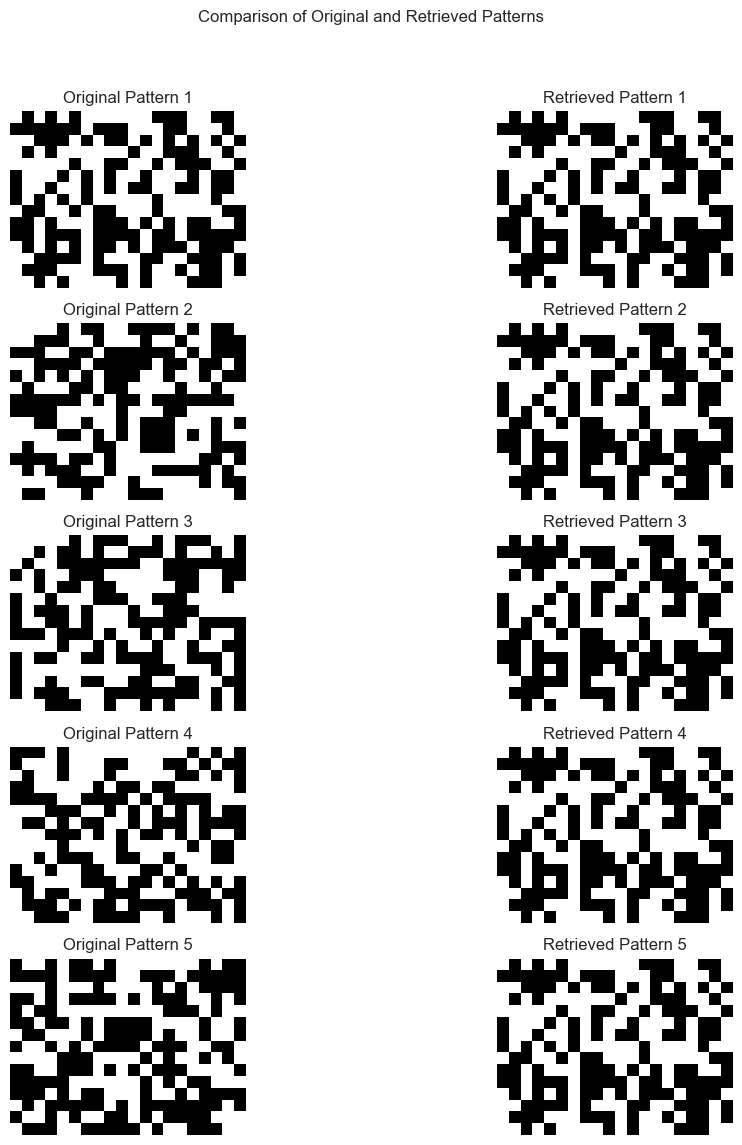

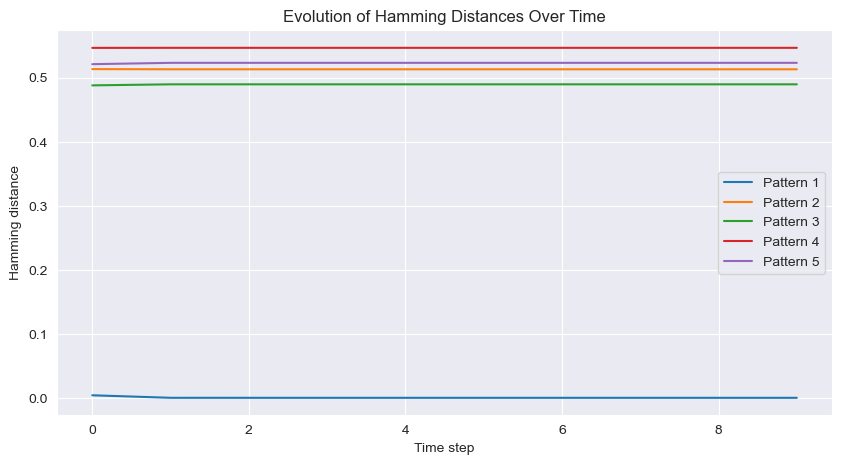

In [358]:
N = 300
M = 5
T = 10
distances, state, patterns = run_standard_hopfield_network_with_hamming_distance(N,M,T)
plot_patterns_state_comparison_hamming_distances(distances, M, state, patterns)

## Exercise 1.4

In [360]:
def pattern_retrieval_error_and_count(patterns, N, T=50, beta=4):
    retrieval_errors = []
    retrieval_counts = []
    for pattern in patterns:
        initial_state = flip_bits(pattern, c=0.05)
        state = initial_state
        
        for t in range(T):
            state = update_state_with_overlaps(state,patterns, beta)
        retrieval_errors.append(hamming_distance(pattern, state))
        retrieval_counts.append(hamming_distance(pattern, state) <= 0.05)
    return np.mean(retrieval_errors), np.std(retrieval_errors), np.sum(retrieval_counts)

# Run simulations for different dictionary initializations
def run_simulation_dictionary(M, N=300, iterations=5,beta=4):
    mean_errors = []
    std_errors = []
    pattern_counts = []
    for _ in range(iterations):
        patterns = generate_balanced_random_patterns(N, M)
        mean_error, std_error, count = pattern_retrieval_error_and_count(patterns, N, beta=beta)
        mean_errors.append(mean_error)
        std_errors.append(std_error)
        pattern_counts.append(count)
    return np.mean(mean_errors), np.mean(std_errors), np.mean(pattern_counts)

In [361]:
mean_error, std_error, avg_retrieved = run_simulation_dictionary(5)
print(f"Mean error: {mean_error}, STD of error: {std_error}, Average retrieved patterns: {avg_retrieved}")


Mean error: 0.0004833694133831083, STD of error: 6.0697362533680646e-05, Average retrieved patterns: 5.0


## Exercise 1.5

In [363]:
dict_sizes = range(5, 101, 1)  # Example range
errors = []
stds = []
retrievals = []

for M in dict_sizes:
    mean_error, std_error, avg_retrieved = run_simulation_dictionary(M)
    errors.append(mean_error)
    stds.append(std_error)
    retrievals.append(avg_retrieved)

# Plotting the results
plt.errorbar(dict_sizes, errors, yerr=stds, fmt='ro', label='Error of pattern retrieval')
plt.xlabel('Dictionary Size (M)')
plt.ylabel('Error')
plt.legend()
plt.show()

plt.plot(dict_sizes, retrievals, 'ro', label='Number of retrieved patterns')
plt.xlabel('Dictionary Size (M)')
plt.ylabel('Retrieved Patterns')
plt.legend()
plt.show()

KeyboardInterrupt: 

In [ ]:
retrievals

## Exercise 1.6

In [ ]:
# Ex 1.6 Maximal number of patterns Mmax and retrieval errors beyond Mmax
# This is determined from the plot generated in Ex 1.5, where the number of retrieved patterns starts to decrease
# significantly, and the error increases. This is usually where the network capacity C is reached.
# Mmax is the dictionary size M for which the number of retrieved patterns is maximized before the network's performance
# begins to degrade.



## Exercise 1.7

50
100
300
500
800


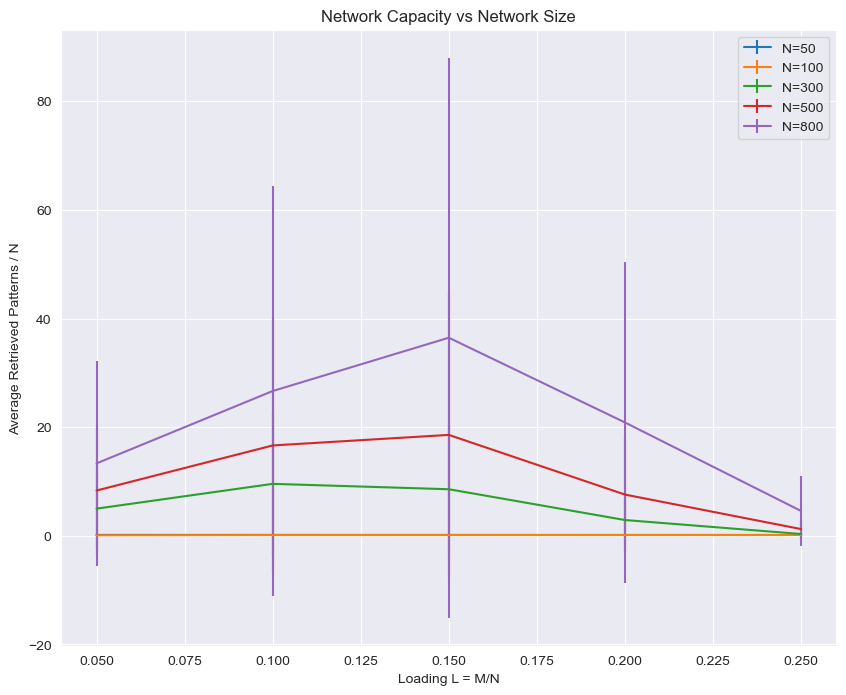

In [364]:
def capacity_study(N_values, loading_values, trials=10):
    """Study the capacity of Hopfield networks across different sizes and loadings."""
    results = {N: [] for N in N_values}

    for N in N_values:
        print(N)
        for L in loading_values:
            M = int(L * N)
            retrieval_rates = [run_simulation_dictionary(M, N) for _ in range(trials)]
            mean_retrieval_rate = np.mean(retrieval_rates)
            std_retrieval_rate = np.std(retrieval_rates)
            results[N].append((mean_retrieval_rate, std_retrieval_rate))

    # Plotting the results
    plt.figure(figsize=(10, 8))
    for N in N_values:
        means, stds = zip(*results[N])
        plt.errorbar(loading_values, means, yerr=stds, label=f'N={N}')

    plt.xlabel('Loading L = M/N')
    plt.ylabel('Average Retrieved Patterns / N')
    plt.title('Network Capacity vs Network Size')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
N_values = [50, 100, 300, 500, 800]
loading_values = [0.05, 0.1, 0.15, 0.2, 0.25]
capacity_study(N_values, loading_values)

## Exercice 1.8

In [ ]:
def plot_beta_impact(N, M, beta_values):
    """ Plot the impact of beta on network retrieval capacity. """
    
    retrieval_rates = [run_simulation_dictionary(N, M, beta=beta) for beta in beta_values]

    plt.figure(figsize=(8, 5))
    plt.plot(beta_values, retrieval_rates, marker='o')
    plt.xlabel('Inverse Temperature Beta')
    plt.ylabel('Retrieval Rate')
    plt.title('Impact of Beta on Memory Retrieval')
    plt.grid(True)
    plt.show()

# Parameters
N = 300  # Number of neurons
M = 5    # Number of patterns
beta_values = np.linspace(0.1, 10, 20)  # Range of beta values to test

plot_beta_impact(N, M, beta_values)

# Exercise 2 Low-activity patterns
## Exercise 2.1

In [ ]:
# Ex 2.1 Equivalence of the standard Hopfield model to low-activity patterns
# This is a theoretical question that requires analyzing the model equations and comparing the models.
# You would need to write down the expressions and compare them to find the values of a, b, and θ that make the models equivalent.



### Comparaison of the two models  
The input for the classical model is : $h_{i}(t)= \sum_{j}{w_{ij}S_{j}(t)}$

If we take $S_{i}(t)=2\sigma_{i}-1$, 

We can find the inpput for a low activity patterns :

 $h_{i}(t)= \sum_{j}{w_{ij}\sigma_{j}(t)}-\theta$, with $w_{ij}=c/N \sum_{j}{(\xi_{i}^{\mu}-b)(\xi_{j}^{\mu}-a)}$

 This model is approximately equivalent to the standard one if $a=b=0.5$ (symmetric model) and $\theta=\sum_{j}w_{ij}$

The model is exactly equivalent to the standard model (upon averaging over the stochastic update), only if the means activities of the patterns are zero. Therefore, we have $\theta = 0$
 

## Exercise 2.2

In [349]:
def generate_low_activity_patterns(N, M, activity):
    """
    Generate M low-activity patterns with N neurons each,
    where each neuron has a probability 'activity' of being 1.
    """
    return np.random.choice([0, 1], (M, N), p=[1-activity, activity]).astype(float)
def compute_weight_matrix(pattern,N,a,b):
    pattern_a=pattern-np.full((pattern.shape),a)
    pattern_b=pattern-np.full((pattern.shape),b)
    
    c= 2/(a*(1-a))
    
    return c/N* np.dot(pattern_b.T, pattern_a)
"""
def hamming_distance_(P, Q):
    
    Compute the Hamming distance between two patterns.
    
    return np.sum(P != Q) / len(P)
"""
def stochastic_spike_variable(S):
    """
    Generate a stochastic spike variable for each neuron based on its state S.
    Probability is derived from the neuron's continuous value.
    """
    return np.random.binomial(1, 0.5 * (S + 1))

def compute_overlaps(patterns, S, a):
    """
    Compute the overlaps m_mu for each pattern.
    """
    overlaps= np.dot((patterns-np.full((patterns.shape),a)),S)
   
    return overlaps

def update_states_with_overlaps(patterns, overlaps,theta, beta,b):
    """
    Update the states of the network based on overlaps and pattern influence.
    """
    H= np.dot(overlaps,(patterns-np.full((patterns.shape),b))) 
    H-=theta
    return np.tanh(beta * H)

def run_simulation_low_activity(N, M_values, a, b, theta_values, beta, T, c=2):
    """
    Run the simulation for multiple theta values and plot the retrieval accuracy.
    """
    patterns = generate_low_activity_patterns(N, M, a)
    initial_state = patterns[0].copy()  # Initialize the state close to the first pattern
    hamming_distances = []
    for theta in theta_values:
            S = initial_state.copy()
            for t in range(T):
                overlaps = compute_overlaps(patterns, S, a)
                S = update_states_with_overlaps(patterns, overlaps,theta, beta,b)
                S = np.array([stochastic_spike_variable(si) for si in S])
            # Evaluate performance after the last update
            distances = [hamming_distance(S, p) for p in patterns]
            mean_distance = np.mean(distances)
            hamming_distances.append(mean_distance)

    return theta_values, hamming_distances

In [350]:
N=289 #neurons
M= 5 #patterns
a=0.5
b=0.5
beta=4
c=2/(a*(1-a))
patterns=generate_low_activity_patterns(N,M,a)
initial_state = flip_bits(patterns[0], c=0.15)

weight=compute_weight_matrix(patterns,N,a,b)
#theta =np.sum(weight)
theta=0
S=initial_state
for t in range(T):
            overlaps = compute_overlaps(patterns, S, a)
            S = update_states_with_overlaps(patterns, overlaps,theta, beta,b)
            S = np.array([stochastic_spike_variable(si) for si in S])


fig, ax = plt.subplots(nrows=M, ncols=2, figsize=(15, 15))
    # Display the original pattern
for i in range(M):
    ax[i, 0].imshow(patterns[i].reshape(17,17), cmap='binary', vmin=-1, vmax=1)
    ax[i, 0].set_title(f'Original Pattern {i+1}')
    ax[i, 0].axis('off')  # Hide grid lines and ticks for clarity
    # Display the retrieved pattern
    ax[i, 1].imshow(S.reshape(17,17), cmap='binary', vmin=-1, vmax=1)
    ax[i, 1].set_title(f'Retrieved Pattern {i+1}')
    ax[i, 1].axis('off')  # Hide grid lines and ticks for clarity
plt.suptitle("Comparison of Original and Retrieved Patterns")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("Ex0.2_pattern_retrieval.png", )
plt.show()



TypeError: flip_bits() missing 1 required positional argument: 'neuron_types'

In [ ]:
N = 300  # neurons
M = 5    # patterns
a = 0.1  # activity level
b = 0.1  # parameter for weight calculation
theta = [0.5]  # neuronal firing threshold
beta = 4  # inverse temperature
T = 20   # time steps

final_state = run_simulation_low_activity(N, M, a, b, theta, beta, T)
print(final_state)

## Exercise 2.3


In [ ]:
def run_simulation_and_plot(N, M_values, a, b, theta_values, beta, T, c=2):
    """
    Run the simulation for multiple theta values and plot the retrieval accuracy.
    """
    retrieval_rates = np.zeros((len(M_values), len(theta_values)))

    for i, M in enumerate(M_values):
        print(M)
        patterns = generate_low_activity_patterns(N, M, a)

        for j, theta in enumerate(theta_values):
            retrieval_count=0
            for pattern in patterns:
                # Initialize the state close to the pattern with some bits flipped
                initial_state = pattern.copy()
                initial_state = flip_bits(initial_state,0.05)  # Flip the bits
                S = initial_state.copy()
                for _ in range(T):
                    overlaps = compute_overlaps(patterns, S, a)
                    S = update_states_with_overlaps(patterns, overlaps, theta, beta, b)
                    S = np.array([stochastic_spike_variable(si) for si in S])
                # Evaluate performance after the last update
                if hamming_distance(S, pattern) <= 0.05:
                    retrieval_count += 1
    
            retrieval_rate = retrieval_count / M
            retrieval_rates[i, j] = retrieval_rate

    # Plotting the results
    plt.figure(figsize=(10, 8))
    for j, theta in enumerate(theta_values):
        plt.plot(M_values, retrieval_rates[:, j], label=f'Theta = {theta:.2f}', marker='o')

    plt.xlabel('Number of Patterns (M)')
    plt.ylabel('Retrieval Rate (Fraction of Patterns Retrieved)')
    plt.title('Network Capacity vs Number of Patterns and Theta')
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
# Ex 2.3 Compute the capacity of the network with N=300 and low-activity patterns
# You would need to run simulations similar to the previous exercises to estimate the network's capacity.
N = 300  # Number of neurons
M_values = np.arange(1, 21, 1)    # Number of patterns
a = 0.1  # Activity level
b=0.1
theta_values =[10.0]
#theta_values = np.linspace(0, 1, 10)  # Range of theta values to test
beta = 4  # Inverse temperature
T = 50   # Time steps

# Run the simulation
run_simulation_and_plot(N, M_values, a, b, theta_values, beta, T)

"""
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(theta_vals, mean_distances, marker='o')
plt.title('Mean Hamming Distance Across Theta Values')
plt.xlabel('Theta')
plt.ylabel('Mean Hamming Distance (Lower is better)')
plt.grid(True)
plt.show()
"""

In [ ]:
# Ex 2.4 Find the threshold θ that corresponds to the best capacity for a=b=0.5
# This involves running simulations over a range of θ values and observing which one results in the highest capacity.

N = 300  # Number of neurons
M = 50    # Number of patterns
a = 0.5  # Activity level
b=0.5
theta_values = np.linspace(0, 1, 20)  # Range of theta values to test
beta = 4  # Inverse temperature
T = 20   # Time steps

# Run the simulation
theta_vals, mean_distances = run_simulation_low_activity(N, M, a, b, theta_values, beta, T)


# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(theta_vals, mean_distances, marker='o')
plt.title('Mean Hamming Distance Across Theta Values')
plt.xlabel('Theta')
plt.ylabel('Mean Hamming Distance (Lower is better)')
plt.grid(True)
plt.show()

In [ ]:
a = 0.1  # Activity level

theta_vals, mean_distances = run_simulation_low_activity(N, M, a, a, theta_values, beta, T)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(theta_vals, mean_distances, marker='o')
plt.title('Mean Hamming Distance Across Theta Values')
plt.xlabel('Theta')
plt.ylabel('Mean Hamming Distance (Lower is better)')
plt.grid(True)
plt.show()

a = 0.05  # Activity level

theta_vals, mean_distances = run_simulation_low_activity(N, M, a, a, theta_values, beta, T)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(theta_vals, mean_distances, marker='o')
plt.title('Mean Hamming Distance Across Theta Values')
plt.xlabel('Theta')
plt.ylabel('Mean Hamming Distance (Lower is better)')
plt.grid(True)
plt.show()

In [ ]:
# Ex 2.5 Repeat for different values of a and b for low-activity cases
# Similar to Ex 2.4, you would vary a and b and run simulations to find the optimal θ and the corresponding capacity.


In [ ]:

# Ex 2.6 Experiment with asymmetric connectivities by varying the value of b
# Yet again, this would involve simulations where you vary b and measure the network's capacity, looking for the optimal combination of b and θ.

# Below is an example simulation loop for Ex 2.3
def simulate_capacity(N, M, activity, theta, beta=4, iterations=100):
    patterns = generate_low_activity_patterns(N, M, activity)
    retrieved_patterns = 0

    for _ in range(iterations):
        initial_state = np.random.choice([0, 1], N, p=[1-activity, activity])
        state = initial_state

        for t in range(20):  # Run for a certain number of time steps
            state = update_states_with_overlaps(state, patterns, activity, activity, [theta], beta,N,0.1)

        # Check if the first pattern is retrieved
        if hamming_distance(state, patterns[0]) <= 0.05:
            retrieved_patterns += 1

    return retrieved_patterns / iterations

# Example simulation with specific parameters
N = 300
M = 5
activity = 0.1
theta = 0.1  # This would be varied to find the optimal value
retrieval_rate = simulate_capacity(N, M, activity, theta)
print(f"Retrieval rate: {retrieval_rate}")


# Exercice 3

## Exercise 3.1

In [476]:
def initialize_neuron_types(N, M, p_exc=0.8, include_second_inhibitory=False):
    """
    Randomly assign each neuron as excitatory, first inhibitory population, or second inhibitory population based on a boolean flag.

    Args:
    N: Total number of neurons
    M: Number of pattern sets
    p_exc: Probability that a neuron is excitatory
    include_second_inhibitory: Boolean flag to include the second inhibitory population

    Returns:
    neuron_types_list: List of arrays of neuron types for each pattern set
    """
    neuron_types_list = []
    for i in range(M):
        if include_second_inhibitory:
            # Calculate probabilities for inhibitory populations
            p_inh_total = 1 - p_exc
            p_inh1 = p_inh_total / 2
            p_inh2 = p_inh_total / 2

            # Ensure the probabilities sum to 1
            assert np.isclose(p_exc + p_inh1 + p_inh2, 1.0), "Probabilities must sum to 1"
            neuron_types = np.random.choice([1, 0, 2], size=N, p=[p_exc, p_inh1, p_inh2])
        else:
            # Only excitatory and first inhibitory population
            assert np.isclose(p_exc + (1 - p_exc), 1.0), "Probabilities must sum to 1"
            neuron_types = np.random.choice([1, 0], size=N, p=[p_exc, 1 - p_exc])
        neuron_types_list.append(neuron_types)
    return neuron_types_list
def create_weight_matrix(N, neuron_types, c, a, N_I, K, patterns):
    """
    Create a weight matrix for the neural network.
    Args:
    N: Total number of neurons
    neuron_types: Array of neuron types (1 for excitatory, 0 for inhibitory)
    w_ee, w_ei, w_ie, w_ii: Weight constants for different types of connections

    Returns:
    W: Weight matrix (N x N)
    """
    W = np.zeros((N, N),dtype=float)
    EE = 0
    EI = 0
    IE = 0
    II = 0
    EEnul = 0
    # Compute contributions from patterns for E-E and I-E connections
    for pattern in patterns:
        for i in range(N):
            for j in range(N):
                #print("neuron i and j", neuron_types[i], neuron_types[j])
                if neuron_types[i] == 1 and neuron_types[j] == 1:
                    # Excitatory to Excitatory connections
                    W[i, j] += (c/N) * pattern[i] * pattern[j]
                    #print("neuron number:", i, j)
                    #print("E->E",W[i,j])
                    EE +=1
                    if (pattern[i]*pattern[j] == 0):
                        EEnul +=1
                elif neuron_types[i] == 1 and neuron_types[j] == 0:
                    # Inhibitory to Excitatory connections
                    W[i, j] = -c * a / N_I* pattern[i]
                    #print("neuron number:", i, j)
                    IE +=1
                    #print("I->E",W[i,j])
                elif neuron_types[i] == 0 and neuron_types[j] == 1:
                    
                    W[i, j] = 1 / K
                    #print("neuron number:", i, j)
                    #print("E->I",W[i, j])
                    EI +=1
                elif neuron_types[i] == 0 and neuron_types[j] == 0:
                    W[i,j] = 0
                    #print("neuron number:", i, j)
                    #print("E->I",W[i, j])
                    II +=1
                    
    #print("EE",EE)
    #print("EI",EI)
    #print("IE",IE)
    #print("II",II)
    #print("EEnul",EEnul)
    #print(W)
    return W

In [20]:
def create_weight_matrix_v2(N, neuron_types, c, a, N_I, K, patterns):
    """
    Create a weight matrix for the neural network.
    Args:
    N: Total number of neurons
    neuron_types: Array of neuron types (1 for excitatory, 0 for inhibitory)
    c: Scaling factor for excitatory connections
    a: Activity level of the network
    N_I: Number of inhibitory neurons
    K: Scaling factor for inhibitory connections
    patterns: Array of stored patterns

    Returns:
    W: Weight matrix (N x N)
    """
    W = np.zeros((N, N), dtype=float)

    # Get indices of excitatory and inhibitory neurons
    exc_neurons = np.where(neuron_types == 1)[0]
    inh_neurons = np.where(neuron_types == 0)[0]

    # Compute contributions from patterns for E-E connections
    for pattern in patterns:
        pattern_exc = pattern[exc_neurons]
        # Outer product gives a matrix of all pairwise multiplications
        W[np.ix_(exc_neurons, exc_neurons)] += c / N * np.outer(pattern_exc, pattern_exc)

    # Set I-E connections (note: I-E weights are independent of patterns)
    W[np.ix_(exc_neurons, inh_neurons)] = -c * a / N_I

    # Set E-I connections (note: E-I weights are independent of patterns)
    W[np.ix_(inh_neurons, exc_neurons)] = 1 / K

    # I-I connections are set to zero, which is already done by np.zeros

    return W

In [479]:
def flip_bits(patterns, c, neuron_types, include_second_inhibitory=False):
    """
    Flip a portion 'c' of bits in the pattern, but only for excitatory neurons.

    Args:
    patterns (np.array): The array representing the neural patterns.
    c (float): The fraction of the excitatory neurons to flip.
    neuron_types (np.array): An array indicating whether each neuron is excitatory (1), first inhibitory (0), or second inhibitory (2).
    include_second_inhibitory (bool): Whether to include the second inhibitory population.

    Returns:
    np.array: The new patterns with flipped bits for a subset of excitatory neurons.
    """
    initial_state_list = []
    for pattern in patterns:
        pattern = pattern.reshape(-1, 1)
        # Get indices of excitatory neurons
        excitatory_indices = np.where(neuron_types == 1)[0]

        # Choose a subset of excitatory neurons to flip
        num_to_flip = int(len(excitatory_indices) * c)
        flip_indices = np.random.choice(excitatory_indices, size=num_to_flip, replace=False)

        pattern_flipped = pattern.copy()
        for i in flip_indices:
            pattern_flipped[i] = 1 - pattern[i]  # This flips 0 to 1 and 1 to 0

        pattern_flipped = pattern_flipped.reshape(1, -1)
        initial_state_list.append(pattern_flipped)

    return initial_state_list

In [324]:
def stochastic_spike_variable(S):
    """
    Generate a stochastic spike variable for each neuron based on its state S.
    Probability is derived from the neuron's continuous value, ensuring it only outputs 0 or 1.
    """
    # Ensure state values are clamped to the range [-1, 1]
    #print("S_pre_clip",S.reshape(1,-1))
    S = np.clip(S, -1, 1)
    #print("S_post_clip", S.reshape(1,-1))
    # Calculate probability of spiking
    #print("State,pre,probas",np.unique(S))
    p = 0.5 * (S + 1)  # This maps S from [-1, 1] to [0, 1]

    # Generate spikes based on calculated probabilities
    #print("probas",np.unique(p))
    spikes = np.random.binomial(1, p)
    #print("spikes",spikes.reshape(1,-1))
    return spikes

In [285]:
def plot_exc_inh(patterns, initial_state, neuron_types, N,h):
    # Filter to include only excitatory neurons for pattern and state
    excitatory_indices = np.where(neuron_types == 1)[0]
    patterns= patterns.reshape(1,-1)
    patterns_excitatory = patterns[:, excitatory_indices]
    initial_state_excitatory = initial_state[:, excitatory_indices]
    
    # Plotting
    fig, axes = plt.subplots(1, 4, figsize=(24, 6))  # Adjusted size to accommodate four plots

    sns.heatmap(patterns_excitatory, ax=axes[0], cmap='viridis', cbar=False, annot=False)
    axes[0].set_title('Excitatory Neurons - Memory Pattern')

    sns.heatmap(initial_state_excitatory, ax=axes[1], cmap='viridis', cbar=False, annot=False)
    axes[1].set_title('Excitatory Neurons - Initial State')

    
    

    # Plotting the neuron types
    neuron_type_map = neuron_types.reshape(N,1 )  # Reshape for heatmap compatibility
    sns.heatmap(neuron_type_map, ax=axes[2], cmap='coolwarm', cbar=False, annot=False)
    axes[2].set_title('Neuron Types (Red = Excitatory, Blue = Inhibitory)')

    sns.heatmap(h.reshape(-1,1), ax=axes[3], cmap='viridis', cbar=False, annot=False)
    axes[3].set_title('Overlap function h')

    plt.tight_layout()
    plt.show()

In [482]:
def compute_h_in_terms_of_overlaps(pattern, S, neuron_types, a, c, K, use_second_inhibitory):
    """
    Compute the total input h for excitatory and inhibitory neurons in terms of the overlap variables.

    Args:
    patterns (numpy.ndarray): Array of stored patterns in the network.
    S (numpy.ndarray): Current state of the network.
    neuron_types (numpy.ndarray): Array indicating neuron type (1 for excitatory, 0 for first inhibitory population, 2 for second inhibitory population).
    a (float): Activity level of the network.
    c (float): Scaling factor.
    K (int): Number of excitatory neurons each inhibitory neuron connects to.
    use_second_inhibitory (bool): Whether to include the second inhibitory population in the calculations.

    Returns:
    numpy.ndarray: Total input h for all neurons.
    """
    N = len(S)
    num_patterns = patterns.shape[0]

    # Separate excitatory and inhibitory neurons
    S_exc = S[neuron_types == 1]  # States of excitatory neurons
    S_inh_1 = S[neuron_types == 0]  # States of first inhibitory population

    N_exc = S_exc.shape[0]
    N_I1 = S_inh_1.shape[0]

    # Initialize overlaps
    m_exc = np.zeros(num_patterns)
    m_inh_1 = np.zeros(num_patterns)
    
    if use_second_inhibitory:
        S_inh_2 = S[neuron_types == 2]  # States of second inhibitory population
        N_I2 = S_inh_2.shape[0]
        m_inh_2 = np.zeros(num_patterns)
        h_inh_2 = np.zeros(N_I2)

    # Compute overlaps for each pattern
    m_exc = np.dot(pattern[neuron_types == 1].reshape(1,-1), S_exc.reshape(-1,1)) / N_exc
    m_inh_1 = np.dot(pattern[neuron_types == 0].reshape(1,-1), S_inh_1.reshape(-1,1)) / N_I1
    if use_second_inhibitory and np.mean(S_exc) > a:
        m_inh_2 = np.dot(pattern[neuron_types == 2].reshape(1,-1), S_inh_2.reshape(1,-1)) / N_I2

    # Compute total input to excitatory neurons
    h_exc = np.zeros(N_exc)
    for i in range(N_exc):
        h_exc[i] = np.sum(pattern[neuron_types == 1][i] * (c * m_exc - c * a * m_inh_1))
        if use_second_inhibitory and np.mean(S_exc) > a:
            h_exc[i] -= np.sum(patterns[neuron_types == 1][i] * c * a * m_inh_2 )

    # Compute total input to first inhibitory neurons
    h_inh_1 = np.zeros(N_I1)
    for k in range(N_I1):
        h_inh_1[k] = np.sum(S_exc) / K

    # Compute total input to second inhibitory neurons (only if use_second_inhibitory is True and mean activity of excitatory neurons exceeds a)
    if use_second_inhibitory and np.sum(S_exc)/N > a:
        for k in range(N_I2):
            h_inh_2[k] = np.sum(S_exc) / K

    # Combine the total inputs
    h = np.zeros_like(S, dtype=float)
    h[neuron_types == 1] = h_exc.reshape(-1,1)
    h[neuron_types == 0] = h_inh_1.reshape(-1,1)
    if use_second_inhibitory:
        h[neuron_types == 2] = h_inh_2

    return h

In [455]:
def synchronous_update(state, patterns, neuron_types, a, c, K, beta,theta, use_second_inhibitory=False):
    state = state.reshape(-1, 1)
    h = compute_h_in_terms_of_overlaps(patterns, state, neuron_types, a, c, K,use_second_inhibitory=use_second_inhibitory)

    
    excitatory_indices = (neuron_types == 1).reshape(-1)

    new_state_exc = np.tanh(beta * (h[excitatory_indices] - theta))
    
    inhibitory_indices = (neuron_types == 0).reshape(-1)
    new_state_inh = h[inhibitory_indices]
    
    new_state_exc = new_state_exc.reshape(-1, 1)
    new_state_inh = new_state_inh.reshape(-1, 1)

    
    
    new_state = np.zeros_like(state, dtype=float)
    
    new_state[excitatory_indices] = new_state_exc
    new_state[inhibitory_indices] = new_state_inh
    
    new_state = stochastic_spike_variable(new_state)
    return new_state,h

def sequential_update(state, patterns, neuron_types, a, c, K, beta,theta,use_second_inhibitory=False):


    h_inh = compute_h_in_terms_of_overlaps(patterns, state, neuron_types, a, c, K, use_second_inhibitory=use_second_inhibitory)[neuron_types == 0]
    state[neuron_types == 0 ] = stochastic_spike_variable(h_inh)
    # Then update excitatory neurons with the new state of inhibitory neurons
    h = compute_h_in_terms_of_overlaps(patterns, state, neuron_types, a, c, K,use_second_inhibitory=use_second_inhibitory)
    h_exc = h[neuron_types == 1]
    state[neuron_types == 1] = stochastic_spike_variable(np.tanh(beta * (h_exc - theta)))
    return state,h

In [456]:
def update_states_v4(N, W, c, patterns, a, K, N_i, state, neuron_types, theta, beta, update_type):
    # Ensure state is a column vector
    state = state.reshape(-1, 1)
    
    h= compute_h_in_terms_of_overlaps(patterns,state,neuron_types,a,c,K,update_type)
    
    excitatory_indices = (neuron_types == 1).reshape(-1)

    new_state_exc = np.tanh(beta * (h[excitatory_indices] - theta))

    inhibitory_indices = (neuron_types == 0).reshape(-1)
    new_state_inh = h[inhibitory_indices]

    new_state_exc = new_state_exc.reshape(-1, 1)
    new_state_inh = new_state_inh.reshape(-1, 1)
    
    new_state = np.zeros_like(state, dtype=float)

    new_state[excitatory_indices] = new_state_exc
    new_state[inhibitory_indices] = new_state_inh

    new_state = stochastic_spike_variable(new_state)

    return new_state, h

In [457]:
def hamming_distance_test(P1, P2):
    """Compute the Hamming distance between two binary vectors."""
    """
    P1 = P1.ravel()
    P2 = P2.ravel()
    print(P1.shape)
    return (P1.shape[0] - np.dot(P1.reshape(1,-1), P2.reshape(-1,1))) / (2 * P1.shape[0])
    """
    #print(P1.ravel(),P2.ravel())
    return np.sum(P1.ravel() !=P2.ravel())

In [473]:
def run_network_exc_inh_synchronous(N, M, N_i, K, a, c, theta,exc_prob, T, beta, plot = True,use_second_inhibitory=False):

    patterns = generate_low_activity_patterns(N, M, a)
    retrieval_accuracies = []
    neuron_types_list = initialize_neuron_types(N,M,exc_prob,use_second_inhibitory)
    retrieval_errors=[]
    retrieval_counts = []
    state = flip_bits(patterns, a, neuron_types_list)
    
    for mu in range (M):

        neuron_types = neuron_types_list[mu]
        pattern = patterns[mu]
        S = state[mu].reshape(-1,1)
        for i in range(T):

            S,h = synchronous_update(S, pattern, neuron_types, a, c, K, beta, theta,use_second_inhibitory=use_second_inhibitory)

        accuracy = 1 - hamming_distance_test(S[neuron_types==1], np.array(pattern)[neuron_types==1]) / N
        retrieval_accuracies.append(accuracy)
        retrieval_errors.append(hamming_distance_test(S[neuron_types==1], np.array(pattern)[neuron_types==1]))
        retrieval_counts.append(hamming_distance_test(S[neuron_types==1], np.array(pattern)[neuron_types==1]) <= 0.05)

        if plot:
            plot_exc_inh(patterns[mu], state[mu], neuron_types, N,h)
    return np.mean(retrieval_accuracies),np.mean(retrieval_errors), np.std(retrieval_errors), np.sum(retrieval_counts)

def run_network_exc_inh_sequential(N, M, N_i, K, a, c, theta,exc_prob, T, beta, plot = True, use_second_inhibitory=False):

    patterns = generate_low_activity_patterns(N, M, a)
    retrieval_accuracies = []
    neuron_types_list = initialize_neuron_types(N,M,exc_prob)
    retrieval_errors=[]
    retrieval_counts = []
    state = flip_bits(patterns, a, neuron_types_list)
    for mu in range (M):
        
        neuron_types = neuron_types_list[mu]
        pattern = patterns[mu]
        S = state[mu].reshape(-1,1)
        for i in range(T):
            S,h = sequential_update(S, pattern, neuron_types, a, c, K, beta, theta, use_second_inhibitory=use_second_inhibitory)
        accuracy = 1 - hamming_distance_test(S[neuron_types==1], np.array(pattern)[neuron_types==1]) / N
        #print(np.unique(hamming_distance_test(S[neuron_types==1],np.array(pattern)[neuron_types==1])))
        #print(np.unique(hamming_distance_test(S[neuron_types==1], np.array(pattern)[neuron_types==1])))
        retrieval_errors.append(hamming_distance_test(S[neuron_types==1], np.array(pattern)[neuron_types==1]))
        retrieval_counts.append(hamming_distance_test(S[neuron_types==1], np.array(pattern)[neuron_types==1]) <= 0.05)
        retrieval_accuracies.append(np.mean(accuracy))
        
        #print(retrieval_accuracies)

        if plot:
            plot_exc_inh(patterns[mu], state[mu], neuron_types, N,h)



    return np.mean(retrieval_accuracies),np.mean(retrieval_errors), np.std(retrieval_errors), np.sum(retrieval_counts)

In [480]:
def real_test():
    N = 300
    M = 3
    
    N_i = 80
    K = 60
    a = 0.1
    c = 2 / (a * (1-a))
    theta = 1.0 
    inh_prob = (N-N_i)/N
    T = 5
    beta = 4.
    
    retrivals_sequential = run_network_exc_inh_sequential(N, M, N_i, K, a, c, theta, inh_prob, T, beta,plot=False,use_second_inhibitory=False)
    retrievals_synchronous = run_network_exc_inh_synchronous(N, M, N_i, K, a, c, theta, inh_prob, T, beta,plot=False,use_second_inhibitory=False)
    return retrivals_sequential,retrievals_synchronous
retrieval = real_test()
print("retrieval",retrieval)

retrieval ((1.0, 0.0, 0.0, 3), (1.0, 0.0, 0.0, 3))


In [333]:
print(retrieval)

None


50
0.05
2
Synchronous 0.5 1 0.5
0.1
5
Synchronous 0.4 4 0.8
0.15
7
Synchronous 1.0 4 1.3093073414159542
0.2
10
Synchronous 0.3 9 0.9000000000000001
0.25
12
Synchronous 0.4166666666666667 9 0.7592027982620249
100
0.05
5
Synchronous 0.6 4 1.2
0.1
10
Synchronous 0.5 9 1.5
0.15
15
Synchronous 0.3333333333333333 13 1.0110500592068732
0.2
20
Synchronous 0.95 16 1.9358460682605942
0.25
25
Synchronous 1.16 17 1.7590906741836818
300
0.05
15
Synchronous 0.0 15 0.0
0.1
30
Synchronous 2.033333333333333 20 4.600603825103347
0.15
45
Synchronous 1.6888888888888889 35 4.486137770818618
0.2
60
Synchronous 1.15 50 3.623189202898463
0.25
75
Synchronous 2.52 57 5.1674881067432885
500
0.05
25
Synchronous 0.24 19 0.4270831300812524
0.1
50
Synchronous 0.7 39 3.2264531609803355
0.15
75
Synchronous 0.5466666666666666 63 2.7533898299288375
0.2
100
Synchronous 0.5 83 2.5079872407968904
0.25
125
Synchronous 0.848 95 3.6792520979133796
800
0.05
40
Synchronous 0.25 34 0.82915619758885
0.1
80
Synchronous 0.8 62 4.99

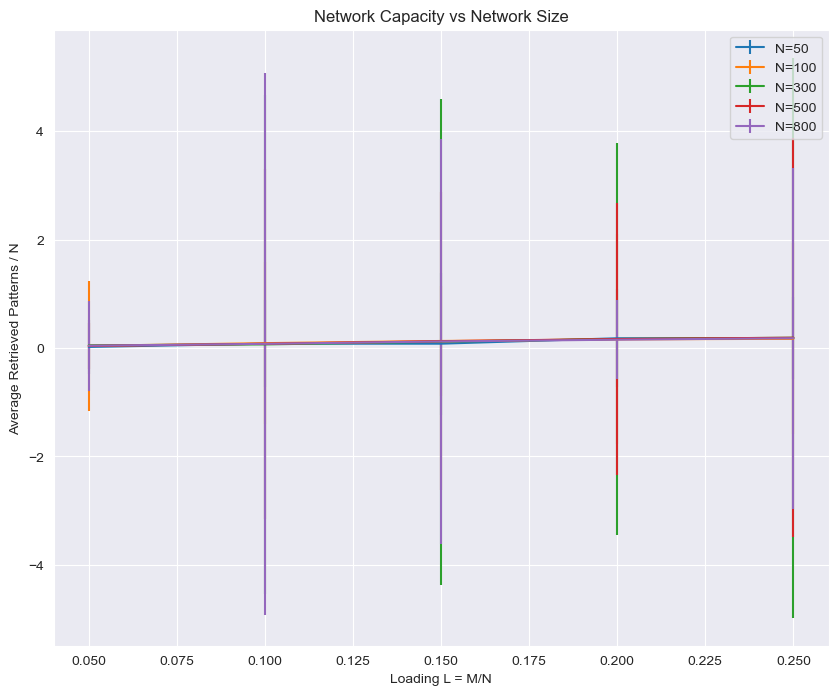

50
0.05
2
Sequential 0.0 2 0.0
0.1
5
Sequential 0.6 4 1.2
0.15
7
Sequential 0.42857142857142855 5 0.7284313590846835
0.2
10
Sequential 0.9 5 1.044030650891055
0.25
12


ValueError: p < 0, p > 1 or p contains NaNs

In [481]:
def capacity_study_exc_inh(N_values, loading_values, N_i_values, K_values, update_type,use_second_population=False):
    """Study the capacity of Hopfield networks across different sizes and loadings."""
    results = {N: [] for N in N_values}

                
    a = 0.1
    c = 2 / (a * (1-a))
    theta = 1.
    
    T = 10
    beta = 4.
    
    for i, N in enumerate(N_values):
        N_i = N_i_values[i]
        K = K_values[i]
        exc_prob = (N-N_i)/N
        print(N)
        for L in loading_values:
            print(L)
            M = int(L * N)
            print(M)
            if update_type == "synchronous":
                retrieval_rates, mean_error, std_error, count = run_network_exc_inh_synchronous(N, M, N_i, K, a, c, theta, exc_prob, T, beta, plot = False,use_second_inhibitory=use_second_population) 
                print("Synchronous",mean_error,count,std_error)
            else:
                retrieval_rates,mean_error, std_error, count = run_network_exc_inh_sequential(N, M, N_i, K, a, c, theta, exc_prob, T, beta, plot = False, use_second_inhibitory=use_second_population)
                print("Sequential",mean_error,count,std_error)
            
            results[N].append((count/N, std_error))

    # Plotting the results
    print("Results",results)
    plt.figure(figsize=(10, 8))
    for N in N_values:
        means, stds = zip(*results[N])
        plt.errorbar(loading_values, means, yerr=stds, label=f'N={N}')

    plt.xlabel('Loading L = M/N')
    plt.ylabel('Average Retrieved Patterns / N')
    plt.title('Network Capacity vs Network Size')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
N_values = [50, 100, 300, 500, 800]
N_i_values = [13,27, 80, 133, 213]
K_values = [10, 20, 60, 100, 160]
loading_values = [0.05, 0.1, 0.15, 0.2, 0.25]
capacity_study_exc_inh(N_values, loading_values, N_i_values, K_values,"synchronous")
capacity_study_exc_inh(N_values, loading_values, N_i_values, K_values,"sequential")


In [483]:
N_values = [50, 100, 300, 500, 800]
N_i_values = [13, 27, 80, 133, 213]
K_values = [10, 20, 60, 100, 160]
loading_values = [0.05, 0.1, 0.15, 0.2, 0.25]
capacity_study_exc_inh(N_values, loading_values, N_i_values, K_values, "synchronous",use_second_population=True)
capacity_study_exc_inh(N_values, loading_values, N_i_values, K_values, "sequential",use_second_population=True)



50
0.05
2


ValueError: shapes (1,0) and (1,0) not aligned: 0 (dim 1) != 1 (dim 0)

## Exercise 3.3

In [32]:
def initialize_neuron_types_2(N, p_exc=0.5, p_inh=0.25):
    """
    Randomly assign each neuron as excitatory, inhibitory, or second inhibitory population.
    
    Args:
    N: Total number of neurons
    p_exc: Probability that a neuron is excitatory
    p_inh: Probability that a neuron is either the first or the second type of inhibitory

    Returns:
    neuron_types: Array of neuron types (1 for excitatory, 0 for first inhibitory, 2 for second inhibitory)
    """
    p_inh2 = p_inh  # Make p_inh2 equal to p_inh
    if not np.isclose(p_exc + 2 * p_inh, 1):
        raise ValueError("Probabilities must sum to 1.")

    # Since p_inh and p_inh2 are the same, we double the probability for inhibitory types
    neuron_types = np.random.choice([1, 0, 2], size=N, p=[p_exc, p_inh, p_inh2])
    return neuron_types

In [33]:
def compute_overlaps_exc_inh_2(patterns, S, neuron_types, a):
    """
    Compute the overlaps m_mu for each pattern.
    
    Args:
    patterns (numpy.ndarray): Array of stored patterns in the network.
    S (numpy.ndarray): Current state of the network.
    neuron_types (numpy.ndarray): Array indicating neuron type (1 for excitatory, 0 for inhibitory).
    a (float): Activity level of the network.
    
    Returns:
    tuple: Tuple containing overlaps for excitatory neurons (m_mu_exc) and inhibitory neurons (m_mu_inh).
    """
    # Separate excitatory and inhibitory neurons
    S_exc = S[neuron_types == 1]  # States of excitatory neurons
    S_inh = S[neuron_types == 0]  # States of inhibitory neurons

    patterns_exc = patterns[:, neuron_types == 1]  # Patterns for excitatory neurons
    patterns_inh = patterns[:, neuron_types == 0]  # Patterns for inhibitory neurons

    # Compute overlaps for excitatory neurons
    overlaps_exc = np.dot((patterns_exc - np.full(patterns.shape,a)), S_exc)

    # Compute overlaps for inhibitory neurons
    overlaps_inh = np.dot((patterns_inh - np.full(patterns.shape,a)), S_inh)

    return overlaps_exc, overlaps_inh


In [34]:
def capacity_study_exc_inh_2(N_values, loading_values, N_i_values, K_values, trials=10):
    """Study the capacity of Hopfield networks across different sizes and loadings."""
    results = {N: [] for N in N_values}


    a = 0.1
    c = 2 / (a * (1-a))
    theta = 1.

    T = 10
    beta = 4.

    for i, N in enumerate(N_values):
        N_i = N_i_values[i]
        K = K_values[i]
        inh_prob = (N-N_i)/N
        print(N)
        for L in loading_values:
            M = int(L * N)
            retrieval_rates = [run_network_exc_inh(N, M, N_i, K, a, c, theta, inh_prob, T, beta, plot = False) for _ in range(trials)]
            mean_retrieval_rate = np.mean(retrieval_rates)
            std_retrieval_rate = np.std(retrieval_rates)
            results[N].append((mean_retrieval_rate, std_retrieval_rate))

    # Plotting the results
    plt.figure(figsize=(10, 8))
    for N in N_values:
        means, stds = zip(*results[N])
        plt.errorbar(loading_values, means, yerr=stds, label=f'N={N}')

    plt.xlabel('Loading L = M/N')
    plt.ylabel('Average Retrieved Patterns / N')
    plt.title('Network Capacity vs Network Size')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
N_values = [50, 100, 300, 500, 800]
N_i_values = [13,27, 80, 133, 213]
K_values = [10, 20, 60, 100, 160]
loading_values = [0.05, 0.1, 0.15, 0.2, 0.25]
capacity_study_exc_inh(N_values, loading_values, N_i_values, K_values)

50
0.05


NameError: name 'generate_low_activity_patterns' is not defined

In [ ]:

# Ex 3.4 Add a second inhibitory population and repeat the capacity study
# You would modify the simulation function to include the second inhibitory population and run simulations to compare

import numpy as np
import matplotlib.pyplot as plt

def initialize_weights(N_exc, N_inh, patterns, c, a):
    """ Initialize weight matrices for E-E, E-I, and I-E connections, including a second inhibitory population """
    W_EE = np.zeros((N_exc, N_exc))
    W_IE1 = np.zeros((N_inh, N_exc))  # First inhibitory population
    W_IE2 = np.zeros((N_inh, N_exc))  # Second inhibitory population

    for pattern in patterns:
        W_EE += np.outer(pattern, pattern)
    W_EE *= c / N_exc
    W_IE1.fill(1.0 / N_exc)  # Simplified for demonstration

    # Assume second inhibitory population has uniform weights, activated based on mean activity
    W_IE2.fill(c * a / N_exc)  # Activated when mean activity of excitatory neurons > a

    return W_EE, W_IE1, W_IE2

def update_network_synchronous(S_exc, S_inh1, S_inh2, W_EE, W_IE1, W_IE2, beta, a):
    """ Perform synchronous update of the network including a second inhibitory population """
    mean_activity = np.mean(S_exc)
    H_exc = np.dot(W_EE, S_exc) - np.dot(W_IE1.T, S_inh1)

    if mean_activity > a:
        H_exc -= np.dot(W_IE2.T, S_inh2)

    H_inh1 = np.dot(W_IE1, S_exc)
    H_inh2 = np.dot(W_IE2, S_exc) if mean_activity > a else np.zeros_like(S_inh2)

    S_exc = np.tanh(beta * H_exc)
    S_inh1 = np.tanh(beta * H_inh1)
    S_inh2 = np.tanh(beta * H_inh2)
    return S_exc, S_inh1, S_inh2

def simulate_network(N_exc, N_inh, patterns, c, beta, T, a):
    """ Simulate the network with given parameters including a second inhibitory population """
    W_EE, W_IE1, W_IE2 = initialize_weights(N_exc, N_inh, patterns, c, a)
    S_exc = np.random.choice([0, 1], N_exc)  # Random initial state for excitatory neurons
    S_inh1 = np.random.choice([0, 1], N_inh)  # Random initial state for first inhibitory population
    S_inh2 = np.random.choice([0, 1], N_inh)  # Random initial state for second inhibitory population

    for t in range(T):
        S_exc, S_inh1, S_inh2 = update_network_synchronous(S_exc, S_inh1, S_inh2, W_EE, W_IE1, W_IE2, beta, a)

    return S_exc, S_inh1, S_inh2

In [ ]:
# Parameters for simulation
N_exc = 300  # Number of excitatory neurons
N_inh = 100  # Number of inhibitory neurons
patterns = [np.random.choice([0, 1], N_exc, p=[0.9, 0.1]) for _ in range(5)]  # Low-activity patterns
c = 1.0  # Scaling factor for weights
beta = 2  # Inverse temperature for the tanh function
T = 50  # Number of time steps
a = 0.1  # Activation threshold for the second inhibitory population

# Run the network simulation
S_exc, S_inh1, S_inh2 = simulate_network(N_exc, N_inh, patterns, c, beta, T, a)
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(loadings, retrieval_rates, marker='o')
plt.title('Storage Capacity vs. Loading (L = M/N_exc)')
plt.xlabel('Loading (L)')
plt.ylabel('Retrieval Rate (Fraction of Patterns Retrieved)')
plt.grid(True)
plt.show()

In [35]:

# Ex 3.5 Implement pattern retrieval with external input
# You would modify the simulation function to include external input when presenting patterns

import numpy as np
import matplotlib.pyplot as plt

def initialize_weights(N_exc, N_inh, patterns, c):
    """ Initialize weight matrices for E-E and E-I connections including a second inhibitory population """
    W_EE = np.zeros((N_exc, N_exc))
    W_IE = np.zeros((N_inh, N_exc))
    for pattern in patterns:
        W_EE += np.outer(pattern, pattern)
    W_EE *= c / N_exc
    W_IE.fill(1.0 / N_exc)  # Simplified for demonstration
    return W_EE, W_IE

def external_input(S_exc, pattern, J, M):
    """ Calculate the external input to the excitatory neurons based on the current pattern """
    return J * (pattern - np.mean(patterns, axis=0))

def update_network_with_input(S_exc, S_inh, W_EE, W_IE, beta, input):
    """ Update the network state with external input """
    H_exc = np.dot(W_EE, S_exc) - np.dot(W_IE.T, S_inh) + input
    H_inh = np.dot(W_IE, S_exc)
    S_exc = np.tanh(beta * H_exc)
    S_inh = np.tanh(beta * H_inh)
    return S_exc, S_inh

def simulate_pattern_presentation(N_exc, N_inh, patterns, c, beta, J, T, presentation_steps):
    S_exc_history = []
    """ Simulate the network with pattern presentations and external inputs """
    W_EE, W_IE = initialize_weights(N_exc, N_inh, patterns, c)
    S_exc = np.random.choice([0, 1], N_exc)
    S_inh = np.random.choice([0, 1], N_inh)
    pattern_order = np.random.permutation(len(patterns))

    for idx in pattern_order:
        current_pattern = patterns[idx]
        input = external_input(S_exc, current_pattern, J, len(patterns))
        for _ in range(presentation_steps):
            S_exc, S_inh = update_network_with_input(S_exc, S_inh, W_EE, W_IE, beta, input)
            S_exc_history.append(S_exc.copy())
        # Measure retrieval accuracy
        overlap = 1 - np.mean(np.abs(current_pattern - S_exc))  # Example measure of overlap
        print(f'Pattern {idx + 1}: Overlap after presentation = {overlap:.2f}')
    return np.array(S_exc_history)


Pattern 9: Overlap after presentation = 0.64
Pattern 1: Overlap after presentation = 0.58
Pattern 4: Overlap after presentation = 0.69
Pattern 2: Overlap after presentation = 0.71
Pattern 5: Overlap after presentation = 0.70
Pattern 6: Overlap after presentation = 0.69
Pattern 3: Overlap after presentation = 0.70
Pattern 10: Overlap after presentation = 0.70
Pattern 7: Overlap after presentation = 0.69
Pattern 8: Overlap after presentation = 0.69


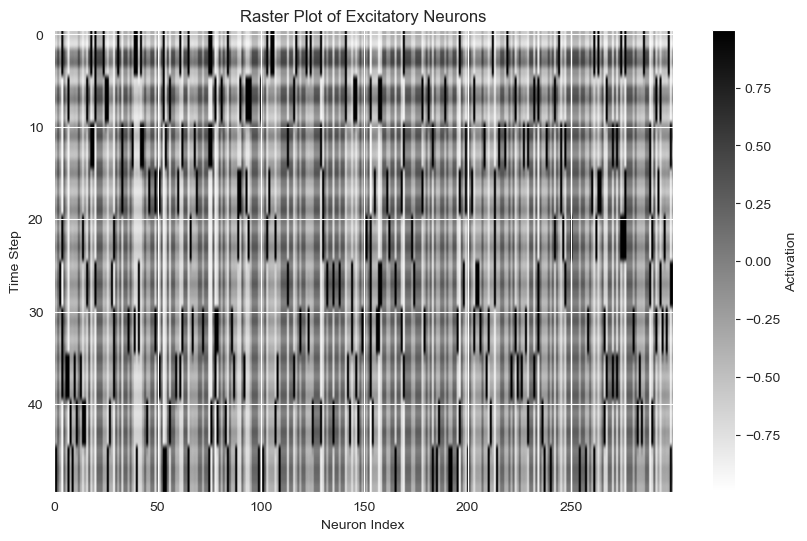

In [36]:
import matplotlib.pyplot as plt

def plot_raster(S_exc_history):
    plt.figure(figsize=(10, 6))
    plt.imshow(S_exc_history, aspect='auto', cmap='binary')
    plt.xlabel('Neuron Index')
    plt.ylabel('Time Step')
    plt.title('Raster Plot of Excitatory Neurons')
    plt.colorbar(label='Activation')
    plt.show()

# Parameters for simulation
N_exc = 300  # Number of excitatory neurons
N_inh = 100  # Number of inhibitory neurons
patterns = [np.random.choice([0, 1], N_exc, p=[0.9, 0.1]) for _ in range(10)]  # 10 low-activity patterns
c = 1.0  # Scaling factor for weights
beta = 2  # Inverse temperature
J = 2  # Strength of external input
T = 50  # Total time steps
presentation_steps = 5  # Time steps each pattern is presented

# Run the simulation
S_exc_history = simulate_pattern_presentation(N_exc, N_inh, patterns, c, beta, J, T, presentation_steps)
plot_raster(S_exc_history)
# Example usage (assuming S_exc_history is collected during simulation):
# plot_raster(S_exc_history)

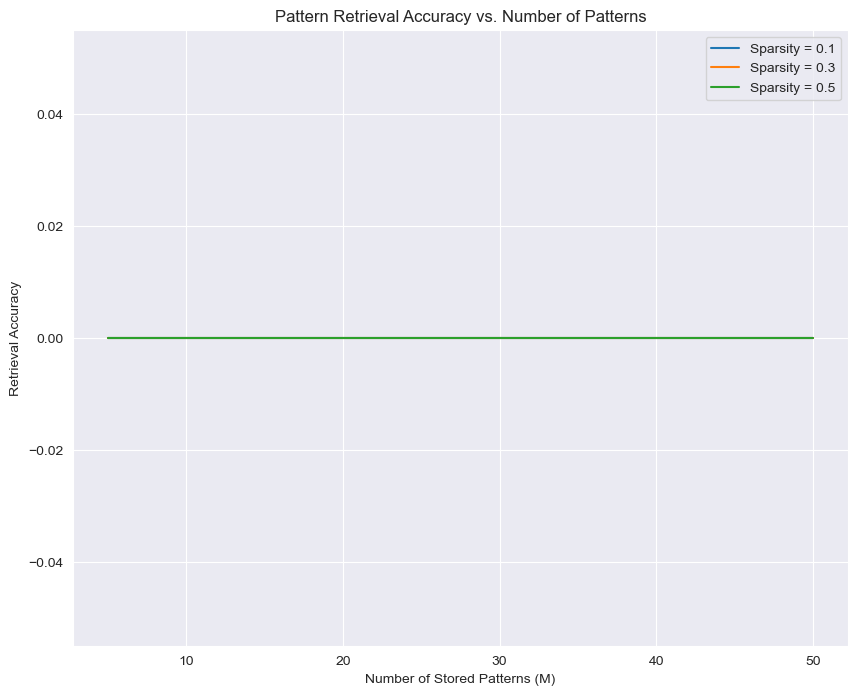

In [37]:
# Ex 3.6 Analyze the dependency of pattern retrieval on network loading and pattern properties
# This would involve running simulations with various network loadings and pattern properties and analyzing the results
import numpy as np
import matplotlib.pyplot as plt

def generate_patterns(N, M, sparsity):
    """Generate sparse binary patterns."""
    return np.random.choice([0, 1], size=(M, N), p=[1-sparsity, sparsity])

def initialize_weights(patterns, N):
    """Initialize weights using Hebbian learning."""
    W = np.zeros((N, N))
    for p in patterns:
        W += np.outer(p, p)
    np.fill_diagonal(W, 0)
    return W / N

def retrieve_pattern(W, pattern, iterations=100):
    """Asynchronously update the network to retrieve a pattern."""
    N = len(pattern)
    state = pattern.copy()
    for _ in range(iterations):
        for i in np.random.permutation(N):
            state[i] = 1 if np.dot(W[i], state) > 0 else 0
    return state

def pattern_retrieval_accuracy(patterns, W):
    """Measure how many patterns are retrieved accurately."""
    N = patterns.shape[1]
    successful_retrievals = 0
    for p in patterns:
        retrieved = retrieve_pattern(W, p)
        if np.array_equal(retrieved, p):
            successful_retrievals += 1
    return successful_retrievals / len(patterns)

# Network parameters
N = 100  # number of neurons
M_values = np.arange(5, 55, 5)  # different numbers of patterns
sparsity_values = [0.1, 0.3, 0.5]  # sparsity of the patterns

plt.figure(figsize=(10, 8))

for sparsity in sparsity_values:
    accuracies = []
    for M in M_values:
        patterns = generate_patterns(N, M, sparsity)
        W = initialize_weights(patterns, N)
        accuracy = pattern_retrieval_accuracy(patterns, W)
        accuracies.append(accuracy)
    plt.plot(M_values, accuracies, label=f'Sparsity = {sparsity}')

plt.xlabel('Number of Stored Patterns (M)')
plt.ylabel('Retrieval Accuracy')
plt.title('Pattern Retrieval Accuracy vs. Number of Patterns')
plt.legend()
plt.grid(True)
plt.show()

In [38]:

# Ex 3.7 (Bonus) Explore how to improve network capacity
# This could involve experimenting with network parameters, learning rules, or model structures to maximize capacity
def pseudoinverse_weights(patterns):
    """Calculate weights using the pseudoinverse rule."""
    P = np.vstack(patterns).T  # pattern matrix
    P_inv = np.linalg.pinv(P)  # pseudoinverse of the pattern matrix
    return np.dot(P, P_inv)

# Simulate with pseudoinverse weights
N = 100
M = 100  # Set M equal to N for demonstration
patterns = generate_patterns(N, M, 0.1)  # Sparse patterns
W = pseudoinverse_weights(patterns)
accuracy = pattern_retrieval_accuracy(patterns, W)

print(f'Retrieval accuracy with pseudoinverse weights for M=N={N}: {accuracy:.2f}')

Retrieval accuracy with pseudoinverse weights for M=N=100: 0.00
